Задание 1
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.

Задание 2
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг
    - оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

Задание 3
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

Задание 4
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

Задание 1
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('keywords.csv')

In [3]:
data.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [194]:
geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

In [219]:
def region(row):

    reg = ''
    for region, cities in geo_data.items():
        for city in cities:

            if city.lower() in row['keyword'].lower():
                reg = region
    if reg == '':
        return 'underfined'
    else:
        return reg
       

In [220]:
data['region'] = data.apply(region, axis =1)

In [235]:
# проверка, что функция сработала и регионы для запросов определились

data[data['region'].isin(list(geo_data.keys()))].head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


Задание 2 Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:

- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг
Результат классификации запишите в столбец class

In [252]:
data = pd.read_csv('ratings.csv')

In [237]:
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [240]:
def class_rating(row):
    if row['rating'] <= 2.0:
        return 'низкий рейтинг'
    elif row['rating'] >= 4.5:
        return 'высокий рейтинг'
    else:
        return 'средний рейтинг'

In [241]:
data['class'] = data.apply(class_rating, axis = 1)

In [242]:
data.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,средний рейтинг
1,1,3,4.0,964981247,средний рейтинг
2,1,6,4.0,964982224,средний рейтинг
3,1,47,5.0,964983815,высокий рейтинг
4,1,50,5.0,964982931,высокий рейтинг


Задание 3 Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [311]:
data = pd.read_csv('ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [265]:
# группировка по пользователям
user_rating_count = data[['userId', 'rating']].groupby('userId').count().reset_index()

#отбираем киноманов, кто оценил от 100 и более фильмов
kinomans = user_rating_count[user_rating_count['rating']>=100]['userId'].tolist()

#фильтруем данные только по киноманам
kinomans_data = data[data['userId'].isin(kinomans)].groupby('userId').agg(['min', 'max'])['timestamp'].reset_index().head()

In [272]:
kinomans_data.head()

,userId,min,max
0,1,964980499,965719662
1,4,945078428,1007574542
2,6,845553109,845556915
3,7,1106635416,1176181731
4,10,1455301553,1455619275


In [299]:
def lifetime(row):
    delta = row['max'] - row['min']
    #переводим разницу в секундах в дни
    return round(delta/60/60/24, 2)

In [300]:
kinomans_data['lifetime'] = kinomans_data.apply(lifetime, axis =1)

In [303]:
kinomans_data.head()

,userId,min,max,lifetime
0,1,964980499,965719662,8.56
1,4,945078428,1007574542,723.33
2,6,845553109,845556915,0.04
3,7,1106635416,1176181731,804.93
4,10,1455301553,1455619275,3.68


In [302]:
#себе на память, проверила реалистичность timestamp
from datetime import datetime
ts = int("1007574542")

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2001-12-05 17:49:02


Задание 4. Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [312]:
years = [i for i in range(1950,2011)]

In [388]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [340]:
def production_year(row):
    
    production_year = 1900
    
    for year in years:
        
        # есть фильмы, где в названии есть число, подходящее под выборку годов - "2001: A Space Odyssey (1968)"
        # чтобы вытянуть год, элемент для поиска увеличен - добавилась в начале открыающая скобка
        if '(' + str(year) in row['title']:
            production_year = round(year,0)
            
    return production_year
        

In [353]:
movies['year'] = movies.apply(production_year, axis = 1)

In [354]:
# есть фильмы, где в названии есть число, подходящее под выборку годов
# movieId: 924, title: 2001: A Space Odyssey (1968)

movies[movies['year']==2001].head()

,movieId,title,genres,year
3247,4052,Antitrust (2001),Crime|Drama|Thriller,2001
3248,4053,Double Take (2001),Action|Comedy,2001
3249,4054,Save the Last Dance (2001),Drama|Romance,2001
3251,4056,"Pledge, The (2001)",Crime|Drama|Mystery|Thriller,2001
3258,4068,Sugar & Spice (2001),Comedy,2001


In [367]:
movies.drop_duplicates(subset = 'movieId', keep = 'first', inplace = True)

In [368]:
movies[movies['year']==1900].count()

movieId    1611
title      1611
genres     1611
year       1611
dtype: int64

In [369]:
ratings = pd.read_csv('ratings.csv')

In [370]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [371]:
#объединим рейтинги и фильмы
joined = ratings.merge(movies, on='movieId', how='inner')

In [372]:
joined.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


In [373]:
rating_by_years = joined.groupby('year').agg(['mean'])['rating']

In [374]:
import matplotlib.pyplot as plt

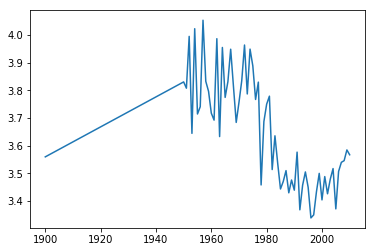

In [384]:
plt.plot(rating_by_years)

Похоже, раньше действительно снимали настоящее кино, не то что сейчас

In [387]:
rating_by_years.sort_values('mean', ascending= False).head(10)

,mean
year,
1957,4.052885
1954,4.022305
1952,3.994565
1962,3.986275
1972,3.963380
1964,3.954545
1974,3.948578
1967,3.948229
1975,3.888179
